Recreate the wind v Lx plot from https://ui.adsabs.harvard.edu/abs/2021ApJ...915...37W/abstract and see what I need to do to add mine.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate
from craftroom import resample
# from astropy.convolution import convolve, Box1DKernel
from scipy.io.idl import readsav
from astropy import constants as const
from astropy.modeling import models, fitting


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


In [3]:
singles_tab = np.genfromtxt('wood21_v1.csv', delimiter=',', dtype=None, encoding=None, names=True)
print(len(singles_tab))
singles_tab = singles_tab[singles_tab['Ṁdot_Ṁdotsun_']!=0.0]
print(len(singles_tab))

17
15


In [5]:
singles_tab.dtype.names

('ID',
 'Star',
 'Spectral_Type',
 'sp_num',
 'd_pc',
 'VISM_km_s−1_',
 'θ_deg',
 'Ṁdot_Ṁdotsun_',
 'log_Lx',
 'Radius_Rsun_',
 'Mass_est')

Model: PowerLaw1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
         amplitude             x_0         alpha
    ------------------- ------------------ -----
    0.14402179042226476 505559.26724808617 -0.77
Model: PowerLaw1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
         amplitude             x_0                alpha        
    ------------------- ------------------ --------------------
    0.20453482295939276 60.532780044723914 -0.22334042675960927


/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/modeling/powerlaws.py:50: RuntimeWarning: invalid value encountered in power
  return amplitude * xx ** (-alpha)
/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/modeling/powerlaws.py:50: RuntimeWarning: invalid value encountered in power
  return amplitude * xx ** (-alpha)


(0.001, 1000.0)

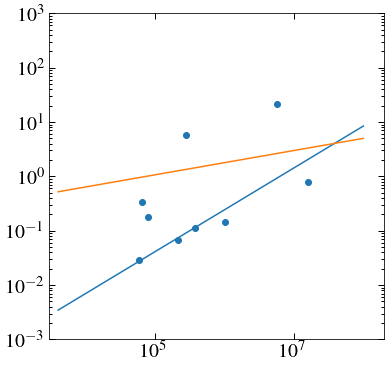

In [68]:
# mdot/surface area v Lx

plt.figure(figsize=(6, 6))
mdotsur = singles_tab['Ṁdot_Ṁdotsun_']/(4*np.pi*singles_tab['Radius_Rsun_']**2)
fxsur = (10**singles_tab['log_Lx'])/(4*np.pi*(singles_tab['Radius_Rsun_']*u.Rsun.to(u.cm))**2)

plt.scatter(fxsur, mdotsur)
plt.xscale('log')
plt.yscale('log')
        
line_init = models.PowerLaw1D(0.1,1e5,-0.77, fixed=dict(alpha=True))

fitter = fitting.LevMarLSQFitter()

line = fitter(line_init, fxsur, mdotsur)

print(line)
xline = np.arange(4000, 1e8, 1000)
plt.plot(xline, line(xline))

myline_init =  models.PowerLaw1D(0.1,1e5,-0.77)

myline = fitter(myline_init, fxsur, mdotsur)

print(myline)
# xline = np.arange(4000, 1e8, 1000)
plt.plot(xline, myline(xline))

plt.xlim(3e3, 2e8)
plt.ylim(1e-3, 1e3)

In [72]:
1000/280.719

3.5622811423523166